<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-notebook-project-3" data-toc-modified-id="Learning-notebook-project-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning notebook project 3</a></span><ul class="toc-item"><li><span><a href="#Get-data" data-toc-modified-id="Get-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Shape-&amp;-column-names" data-toc-modified-id="Shape-&amp;-column-names-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Shape &amp; column names</a></span></li><li><span><a href="#Modules" data-toc-modified-id="Modules-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modules</a></span></li><li><span><a href="#Preprocessor" data-toc-modified-id="Preprocessor-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessor</a></span></li><li><span><a href="#X-&amp;-y" data-toc-modified-id="X-&amp;-y-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>X &amp; y</a></span></li></ul></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#Amélioration-de-RandomForestRegressor" data-toc-modified-id="Amélioration-de-RandomForestRegressor-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Amélioration de RandomForestRegressor</a></span></li><li><span><a href="#Importance-des-Features" data-toc-modified-id="Importance-des-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Importance des Features</a></span></li></ul></div>

### Learning notebook project 3
#### Get data

In [1]:
import pandas as pd
df = pd.read_csv("P3_cleaaned_2021-12.csv", sep=',')  
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,...,0,88434,Hotel,88434.0,2.013701e+11,60.0,7226362.5,7456910.0,249.98,2.83
1,2,2016,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,15064,88502,Hotel,83880.0,2.013701e+11,61.0,8387933.0,8664479.0,295.86,2.86
2,3,2016,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,...,196718,759392,Hotel,756493.0,2.013701e+11,43.0,72587024.0,73937112.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,0,61320,Hotel,61320.0,2.013701e+11,56.0,6794584.0,6946800.5,286.43,4.67
4,8,2016,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,62000,113580,Hotel,123445.0,2.013701e+11,75.0,14172606.0,14656503.0,505.01,2.88


#### Shape & column names

In [2]:
df.shape
print(df.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)'],
      dtype='object')


#### Modules
https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb

In [3]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import numpy as np

#### Preprocessor

In [4]:
#'CouncilDistrictCode', 'YearsENERGYSTARCertified'
# YearsENERGYSTARCertified vérifier NaN % dans le premier notebook

numeric_features = ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                    'ENERGYSTARScore', 'LargestPropertyUseTypeGFA']
categorical_features = ["BuildingType", "PrimaryPropertyType", "Neighborhood", 'LargestPropertyUseType']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#### X & y

In [5]:
Xcols = numeric_features + categorical_features
print(Xcols)
X = df[Xcols]
y = df['SiteEnergyUse(kBtu)']

['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'LargestPropertyUseTypeGFA', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### ElasticNet

In [7]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', ElasticNet())])
# ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 
#https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge
# np.log [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
param_grid = {'model__alpha': np.logspace(-5, 5, 8, endpoint=True), 'model__l1_ratio': np.arange(0, 0.5, 0.1), 'model__max_iter': [10000]}

In [8]:
search = GridSearchCV(pipe, param_grid, return_train_score=True)

In [9]:
results_elasticnet = search.fit(X_train,y_train)
print(results_elasticnet)

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7957537899464756e+16, tolerance: 28183355416104.758
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.768425730565788e+16, tolerance: 28871528323606.426
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.293463746081951e+16, tolerance: 31748909007940.62
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anac

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.000593376248149e+16, tolerance: 28871528323606.426
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4450702669021736e+16, tolerance: 31748909007940.62
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.904839514653188e+16, tolerance: 26295975425405.008
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anac

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.893769615595706e+16, tolerance: 31748909007940.62
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.092985545884934e+16, tolerance: 26295975425405.008
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.33591696980421e+16, tolerance: 35278748870174.27
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anacond

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.314780588154347e+17, tolerance: 26295975425405.008
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7639085153104963e+17, tolerance: 35278748870174.27
  model = cd_fast.sparse_enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

/Users/benprieur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.275178066381587e+16, tolerance: 37601720191358.26
  model = cd_fast.sparse_enet_coordinate_descent(


In [10]:
print('Best score: {:.2f}'.format(results_elasticnet.best_score_))
print('Best params: %s' % results_elasticnet.best_params_)
print("Best estimator: {}".format(results_elasticnet.best_estimator_))

Best score: 0.47
Best params: {'model__alpha': 0.0071968567300115215, 'model__l1_ratio': 0.0, 'model__max_iter': 10000}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'YearBuilt',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                     

In [13]:
result_elastic_df = pd.DataFrame(results_elasticnet.cv_results_)
result_elastic_df.sort_values(['mean_test_score'],ascending = False)[:10]
# https://www.kaggle.com/tomehta/elastic-net-with-hyper-param-tuning-using-grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,param_model__max_iter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,2.304615,0.013313,0.009104,0.003586,0.007197,0.0,10000,"{'model__alpha': 0.0071968567300115215, 'model...",0.156263,0.682315,...,0.468007,0.237992,1,0.762667,0.649396,0.670417,0.598973,0.704241,0.677139,0.054725
11,0.326310,0.012709,0.007150,0.000596,0.007197,0.1,10000,"{'model__alpha': 0.0071968567300115215, 'model...",0.160772,0.685950,...,0.466612,0.242529,2,0.765398,0.655440,0.674881,0.606391,0.711456,0.682713,0.053466
12,0.342113,0.027142,0.006520,0.000292,0.007197,0.2,10000,"{'model__alpha': 0.0071968567300115215, 'model...",0.166050,0.689724,...,0.464283,0.248732,3,0.768270,0.662030,0.679724,0.614624,0.719356,0.688801,0.052058
13,0.422271,0.088907,0.007107,0.001485,0.007197,0.3,10000,"{'model__alpha': 0.0071968567300115215, 'model...",0.172276,0.693620,...,0.460665,0.257328,4,0.771306,0.669249,0.684993,0.623836,0.728051,0.695487,0.050480
14,0.518598,0.059052,0.007286,0.001764,0.007197,0.4,10000,"{'model__alpha': 0.0071968567300115215, 'model...",0.179693,0.697599,...,0.455235,0.269404,5,0.774540,0.677194,0.690735,0.634239,0.737674,0.702876,0.048713
19,0.034469,0.000776,0.006281,0.000331,0.19307,0.4,10000,"{'model__alpha': 0.19306977288832497, 'model__...",0.162702,0.565822,...,0.406733,0.188704,6,0.647325,0.507926,0.565501,0.442293,0.545193,0.541648,0.067465
18,0.032427,0.000318,0.006109,0.000111,0.19307,0.3,10000,"{'model__alpha': 0.19306977288832497, 'model__...",0.168067,0.560184,...,0.404794,0.183880,7,0.640417,0.502541,0.561558,0.436901,0.539701,0.536224,0.067097
17,0.033158,0.004711,0.007032,0.001656,0.19307,0.2,10000,"{'model__alpha': 0.19306977288832497, 'model__...",0.172738,0.555247,...,0.403420,0.179401,8,0.634512,0.498034,0.558192,0.432439,0.535120,0.531659,0.066738
16,0.031071,0.002268,0.006883,0.001334,0.19307,0.1,10000,"{'model__alpha': 0.19306977288832497, 'model__...",0.176839,0.550822,...,0.402425,0.175213,9,0.629352,0.494164,0.555230,0.428643,0.531185,0.527715,0.066393
15,2.586205,0.295393,0.007952,0.001143,0.19307,0.0,10000,"{'model__alpha': 0.19306977288832497, 'model__...",0.180468,0.546784,...,0.401692,0.171278,10,0.624762,0.490773,0.552562,0.425343,0.527728,0.524234,0.066060


In [14]:
best_index_elastic = results_elasticnet.best_index_
print(best_index_elastic)

10


In [15]:
print(result_elastic_df.iloc[best_index_elastic])

mean_fit_time                                                     2.304615
std_fit_time                                                      0.013313
mean_score_time                                                   0.009104
std_score_time                                                    0.003586
param_model__alpha                                                0.007197
param_model__l1_ratio                                                  0.0
param_model__max_iter                                                10000
params                   {'model__alpha': 0.0071968567300115215, 'model...
split0_test_score                                                 0.156263
split1_test_score                                                 0.682315
split2_test_score                                                 0.427959
split3_test_score                                                 0.790751
split4_test_score                                                 0.282746
mean_test_score          

### RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
pipe_forest = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])

In [17]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [10, 20, 50, 100]

#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]

param_grid_forest = {'model__n_estimators' : n_estimators
                     , 'model__max_features': ['auto', 'sqrt'] }

print(param_grid_forest)

{'model__n_estimators': [10, 20, 50, 100], 'model__max_features': ['auto', 'sqrt']}


In [18]:
search_forest = GridSearchCV(pipe_forest, param_grid_forest, return_train_score=True)
print(search_forest)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [19]:
results_forest = search_forest.fit(X_train,y_train)
print(results_forest)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [20]:
results_forest_df = pd.DataFrame(results_forest.cv_results_)
results_forest_df.sort_values(['mean_test_score'],ascending = False)[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.096574,0.007546,0.009307,0.000447,sqrt,20,"{'model__max_features': 'sqrt', 'model__n_esti...",0.280316,0.653267,0.656900,...,0.533600,0.178443,1,0.933928,0.932819,0.905080,0.926257,0.945135,0.928644,0.013254
7,0.486484,0.112521,0.023815,0.006100,sqrt,100,"{'model__max_features': 'sqrt', 'model__n_esti...",0.295397,0.572742,0.645360,...,0.521380,0.142955,2,0.943759,0.929798,0.932292,0.910778,0.937429,0.930811,0.011099
6,0.217203,0.008581,0.012630,0.000086,sqrt,50,"{'model__max_features': 'sqrt', 'model__n_esti...",0.330486,0.534055,0.644421,...,0.511374,0.120726,3,0.947473,0.929474,0.921582,0.914750,0.942180,0.931092,0.012259
4,0.054993,0.005449,0.008644,0.001376,sqrt,10,"{'model__max_features': 'sqrt', 'model__n_esti...",0.229043,0.332873,0.790730,...,0.460827,0.238460,4,0.907468,0.927930,0.929331,0.883651,0.928204,0.915317,0.017810
3,1.718368,0.042064,0.019355,0.000806,auto,100,"{'model__max_features': 'auto', 'model__n_esti...",0.234867,0.671966,0.185275,...,0.411501,0.243733,5,0.954765,0.925212,0.932930,0.922319,0.942313,0.935508,0.011864
2,0.859680,0.039179,0.012904,0.000239,auto,50,"{'model__max_features': 'auto', 'model__n_esti...",0.238292,0.704239,0.038485,...,0.397344,0.278041,6,0.950612,0.914764,0.947232,0.942397,0.942216,0.939444,0.012735
1,0.354749,0.019729,0.009418,0.000630,auto,20,"{'model__max_features': 'auto', 'model__n_esti...",0.239288,0.585274,0.169248,...,0.376273,0.231333,7,0.957795,0.917528,0.946959,0.866603,0.948284,0.927433,0.033275
0,0.180125,0.008069,0.008700,0.001145,auto,10,"{'model__max_features': 'auto', 'model__n_esti...",0.249165,0.639486,-0.067859,...,0.349282,0.300152,8,0.931113,0.943073,0.921295,0.842329,0.915913,0.910745,0.035437


In [21]:
best_index_forest = results_forest.best_index_
print(best_index_forest)

5


In [22]:
print(results_forest_df.iloc[best_index_forest])

mean_fit_time                                                         0.096574
std_fit_time                                                          0.007546
mean_score_time                                                       0.009307
std_score_time                                                        0.000447
param_model__max_features                                                 sqrt
param_model__n_estimators                                                   20
params                       {'model__max_features': 'sqrt', 'model__n_esti...
split0_test_score                                                     0.280316
split1_test_score                                                     0.653267
split2_test_score                                                       0.6569
split3_test_score                                                     0.719702
split4_test_score                                                     0.357815
mean_test_score                                     

### GradientBoostingRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
pipe_gradient = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor())])

In [24]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
# number of estimators
# learning rate
# subsample
# max depth
n_estimators = [500,1000,2000] # 10, 20, 50, 100, 200
learning_rate = [.001,0.01,.1] 
subsample = [.5,.75,1] # 0.2, 0.4, 0,6, 0,8, 1
max_depth = [1,2,4, 6, 8, 10]

param_grid_gradient = { 'model__n_estimators' : n_estimators
                      , 'model__learning_rate' : learning_rate
                      , 'model__subsample' : subsample
                      , 'model__max_depth' : max_depth }

print(param_grid_gradient)

{'model__n_estimators': [500, 1000, 2000], 'model__learning_rate': [0.001, 0.01, 0.1], 'model__subsample': [0.5, 0.75, 1], 'model__max_depth': [1, 2, 4, 6, 8, 10]}


In [25]:
search_gradient = GridSearchCV(pipe_gradient, param_grid_gradient, return_train_score=True)
print(search_gradient)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [26]:
results_gradient = search_forest.fit(X_train,y_train)
print(results_gradient)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

In [27]:
results_gradient_df = pd.DataFrame(results_gradient.cv_results_)
results_gradient_df.sort_values(['mean_test_score'],ascending = False)[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.051262,0.000697,0.007891,0.000137,sqrt,10,"{'model__max_features': 'sqrt', 'model__n_esti...",0.270042,0.724911,0.634462,...,0.543600,0.205164,1,0.947537,0.911932,0.872220,0.916361,0.879467,0.905503,0.027246
7,0.487770,0.047479,0.022009,0.002691,sqrt,100,"{'model__max_features': 'sqrt', 'model__n_esti...",0.299610,0.593532,0.702309,...,0.541446,0.149396,2,0.958343,0.917805,0.945114,0.929223,0.943858,0.938869,0.013999
6,0.269902,0.052036,0.017351,0.004769,sqrt,50,"{'model__max_features': 'sqrt', 'model__n_esti...",0.281562,0.678624,0.698072,...,0.534008,0.176889,3,0.962796,0.924618,0.937146,0.910496,0.948736,0.936759,0.018213
5,0.103908,0.021103,0.009849,0.001053,sqrt,20,"{'model__max_features': 'sqrt', 'model__n_esti...",0.292373,0.601883,0.699473,...,0.515029,0.142098,4,0.931637,0.931801,0.860483,0.904340,0.900801,0.905813,0.026170
3,1.665257,0.015851,0.018955,0.000385,auto,100,"{'model__max_features': 'auto', 'model__n_esti...",0.227609,0.618948,0.178640,...,0.403249,0.231482,5,0.945749,0.906565,0.921389,0.941332,0.939590,0.930925,0.014748
2,0.841392,0.011249,0.013849,0.000980,auto,50,"{'model__max_features': 'auto', 'model__n_esti...",0.251720,0.667787,-0.020287,...,0.367999,0.280145,6,0.946271,0.927077,0.932019,0.931808,0.943674,0.936170,0.007447
0,0.182485,0.007349,0.008635,0.001502,auto,10,"{'model__max_features': 'auto', 'model__n_esti...",0.200099,0.508018,-0.083736,...,0.345605,0.280268,7,0.946064,0.921142,0.925760,0.881314,0.959087,0.926673,0.026516
1,0.342855,0.007842,0.009063,0.000160,auto,20,"{'model__max_features': 'auto', 'model__n_esti...",0.243416,0.692684,-0.084198,...,0.247925,0.372199,8,0.954495,0.930674,0.939280,0.929083,0.947524,0.940211,0.009728


In [28]:
best_index_gradient = results_gradient.best_index_
print(best_index_gradient)

4


In [29]:
print(results_gradient_df.iloc[best_index_gradient])

mean_fit_time                                                         0.051262
std_fit_time                                                          0.000697
mean_score_time                                                       0.007891
std_score_time                                                        0.000137
param_model__max_features                                                 sqrt
param_model__n_estimators                                                   10
params                       {'model__max_features': 'sqrt', 'model__n_esti...
split0_test_score                                                     0.270042
split1_test_score                                                     0.724911
split2_test_score                                                     0.634462
split3_test_score                                                     0.761659
split4_test_score                                                     0.326928
mean_test_score                                     

(2.3046148300170897, 0.09657406806945801, 0.05126180648803711)
(0.009104442596435548, 0.009307193756103515, 0.007891082763671875)
[0 3 6]


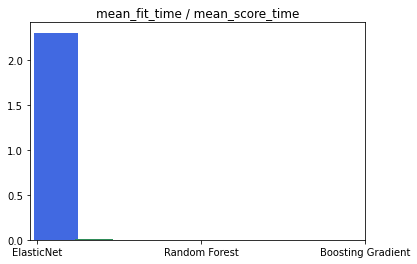

In [33]:
import matplotlib.pyplot as plt

N = 3
mean_fit_time = (result_elastic_df.iloc[best_index_elastic].mean_fit_time, results_forest_df.iloc[best_index_forest].mean_fit_time, results_gradient_df.iloc[best_index_gradient].mean_fit_time)
mean_score_time = (result_elastic_df.iloc[best_index_elastic].mean_score_time, results_forest_df.iloc[best_index_forest].mean_score_time, results_gradient_df.iloc[best_index_gradient].mean_score_time)

print(mean_fit_time)
print(mean_score_time)


ind = np.arange(N) * 3
print(ind)
width = 0.7 

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(width, mean_fit_time, color='royalblue')
rects2 = ax.bar(width+width, mean_score_time, width, color='seagreen')

gridnumber = range(1,4)

ax.set_title('mean_fit_time / mean_score_time')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('ElasticNet', 'Random Forest', 'Boosting Gradient') )

plt.show()

[0 3 6]


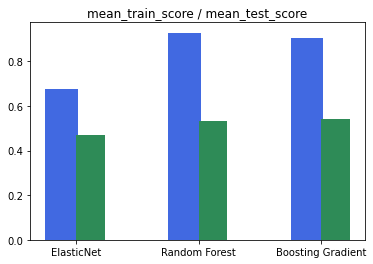

In [32]:
import matplotlib.pyplot as plt

N = 3
mean_train_score = (result_elastic_df.iloc[best_index_elastic].mean_train_score, results_forest_df.iloc[best_index_forest].mean_train_score, results_gradient_df.iloc[best_index_gradient].mean_train_score)
mean_test_score = (result_elastic_df.iloc[best_index_elastic].mean_test_score, results_forest_df.iloc[best_index_forest].mean_test_score, results_gradient_df.iloc[best_index_gradient].mean_test_score)


ind = np.arange(N) * 3
print(ind)
width = 0.7 

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, mean_train_score, color='royalblue')
rects2 = ax.bar(ind+width, mean_test_score, width, color='seagreen')

gridnumber = range(1,4)

ax.set_title('mean_train_score / mean_test_score')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('ElasticNet', 'Random Forest', 'Boosting Gradient') )

plt.show()

### Amélioration de RandomForestRegressor

In [34]:
# https://scikit-learn.org/stable/modules/permutation_importance.html
n_estimators2 = [ 10, 20, 50, 100, 200]
learning_rate2 = [.001,0.01,.1] 
subsample2 = [0.2, 0.4, 0,6, 0,8, 1]
max_depth2 = [1,2,4, 6, 8, 10]

param_grid_gradient2 = { 'model__n_estimators' : n_estimators2
                      , 'model__learning_rate' : learning_rate2
                      , 'model__subsample' : subsample2
                      , 'model__max_depth' : max_depth2 }

print(param_grid_gradient2)

{'model__n_estimators': [10, 20, 50, 100, 200], 'model__learning_rate': [0.001, 0.01, 0.1], 'model__subsample': [0.2, 0.4, 0, 6, 0, 8, 1], 'model__max_depth': [1, 2, 4, 6, 8, 10]}


In [35]:
search_gradient2 = GridSearchCV(pipe_gradient, param_grid_gradient2, return_train_score=True)
print(search_gradient2)
results_gradient2 = search_forest.fit(X_train,y_train)
print(results_gradient2)
results_gradient_df2 = pd.DataFrame(results_gradient2.cv_results_)
results_gradient_df2.sort_values(['mean_test_score'],ascending = False)[:10]
best_index_gradient2 = results_gradient2.best_index_
print(best_index_gradient2)
print(results_gradient_df2.iloc[best_index_gradient2])

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                

[0]


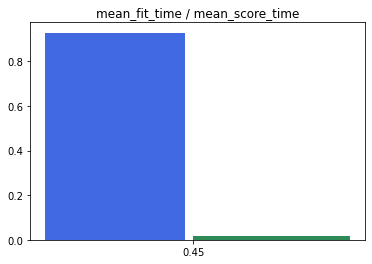

In [36]:
import matplotlib.pyplot as plt

N = 1
mean_fit_time = (results_gradient_df2.iloc[best_index_gradient2].mean_fit_time)
mean_score_time = (results_gradient_df2.iloc[best_index_gradient2].mean_score_time)

ind = np.arange(N)
print(ind)
width = 0.9 

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, mean_train_score, color='royalblue')
rects2 = ax.bar(ind+width, mean_score_time, width, color='seagreen')

gridnumber = [ 1 ]

ax.set_title('mean_fit_time / mean_score_time')
ax.set_xticks((ind + ind + width) / 2)

plt.show()

[0]


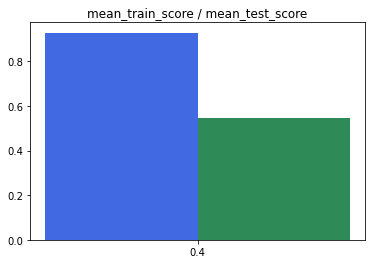

In [37]:
import matplotlib.pyplot as plt

N = 1
mean_train_score = (results_gradient_df2.iloc[best_index_gradient2].mean_train_score)
mean_test_score = (results_gradient_df2.iloc[best_index_gradient2].mean_test_score)


ind = np.arange(N)
print(ind)
width = 0.8

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, mean_train_score, color='royalblue')
rects2 = ax.bar(ind+width, mean_test_score, width, color='seagreen')


ax.set_title('mean_train_score / mean_test_score')
ax.set_xticks((ind + ind + width) / 2)

plt.show()

### Importance des Features

In [38]:
# https://scikit-learn.org/stable/modules/permutation_importance.html
from sklearn.inspection import permutation_importance
r = permutation_importance(results_gradient2, X_test, y_test,
                     n_repeats=30,
                     random_state=0)

In [39]:
for i in r.importances_mean.argsort()[::-1]:
   #if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
   print(f"{Xcols[i]:<8} => "
   f"{ r.importances_mean[i]: .3f}"
   f" +/- { r.importances_std[i]: .3f}")

PrimaryPropertyType =>  0.139 +/-  0.010
LargestPropertyUseTypeGFA =>  0.118 +/-  0.008
PropertyGFABuilding(s) =>  0.107 +/-  0.006
LargestPropertyUseType =>  0.099 +/-  0.004
PropertyGFATotal =>  0.092 +/-  0.009
NumberofBuildings =>  0.052 +/-  0.001
Neighborhood =>  0.043 +/-  0.005
NumberofFloors =>  0.030 +/-  0.009
ENERGYSTARScore =>  0.021 +/-  0.010
Latitude =>  0.008 +/-  0.007
Longitude =>  0.005 +/-  0.003
PropertyGFAParking =>  0.001 +/-  0.005
BuildingType =>  0.000 +/-  0.001
YearBuilt => -0.005 +/-  0.004
